In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_no_pretrain = pd.read_csv("/home/ss26/Projects/Smart-Tools/progress/apr5/Human trained + no pretraining.csv")
df_no_pretrain 


,Unnamed: 0,percent,accuracy,logloss
0,0,0.02,0.449371,1.321034
1,1,0.04,0.686918,0.863605
2,2,0.06,0.697865,0.735405
3,3,0.08,0.743842,0.679335
4,4,0.10,0.750410,0.615557
5,5,0.12,0.738369,0.650184
6,6,0.14,0.772852,0.597279
7,7,0.16,0.741653,0.753158
8,8,0.18,0.768473,0.578639
9,9,0.20,0.753147,0.680863


In [6]:
df_pretrained = pd.read_csv("/home/ss26/Projects/Smart-Tools/progress/apr5/Human trained + Yaskawa pretraining.csv")
df_pretrained

,Unnamed: 0,percent,accuracy,logloss
0,0,0.02,0.642583,2.133382
1,1,0.04,0.656267,1.537887
2,2,0.06,0.690750,1.255954
3,3,0.08,0.724685,1.010413
4,4,0.10,0.728517,0.951605
5,5,0.12,0.725780,0.917428
6,6,0.14,0.726327,0.876290
7,7,0.16,0.731801,0.899214
8,8,0.18,0.730159,0.843546
9,9,0.20,0.743842,0.832075


In [ ]:
def plot_data_vs_acc_logloss(percents, accs, title):
    plt.cla()
    plt.plot([percent*100 for percent in percents], [acc*100 for acc in accs], 'xg--')
    plt.title(f"Test Accuracy vs Dataset volume - " + title)
    plt.xlabel("Percentage of Data (in %)")
    plt.ylabel("Accuracy (in %)")
    plt.savefig("/home/ss26/Projects/Smart-Tools/progress/apr5/accs_vs_data/" + title + ".png", dpi=600)

def plot_data_vs_logloss(percents, lls, title):
    plt.cla()
    plt.plot([percent*100 for percent in percents], lls, 'xm--')
    plt.title(f"Log-Loss vs Dataset volume - " + title)
    plt.xlabel("Percentage of Data (in %)")
    plt.ylabel("Log Loss")
    plt.savefig("/home/ss26/Projects/Smart-Tools/progress/apr5/lls_vs_data/" + title + ".png", dpi=600)

In [8]:
percents = list(df_no_pretrain['percent'])

accs_no_pretrain = list(df_no_pretrain['accuracy'])
accs_pretrain = list(df_pretrained['accuracy'])

lls_no_pretrain = list(df_no_pretrain['logloss'])
lls_pretrain = list(df_pretrained['logloss'])


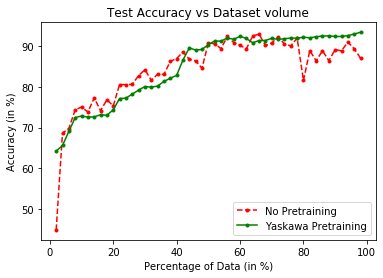

In [21]:
# plot combined pretrain and no pretrain
plt.cla()
plt.plot([percent*100 for percent in percents], [acc*100 for acc in accs_no_pretrain], '.r--')
plt.plot([percent*100 for percent in percents], [acc*100 for acc in accs_pretrain], '.g-')
plt.title(f"Test Accuracy vs Dataset volume")
plt.xlabel("Percentage of Data (in %)")
plt.ylabel("Accuracy (in %)")
plt.legend(["No Pretraining", "Yaskawa Pretraining"])
# plt.show()
plt.savefig("/home/ss26/Projects/Smart-Tools/progress/apr5/accs_vs_data/pretrain_no_pretrain_combined.png", dpi=600)


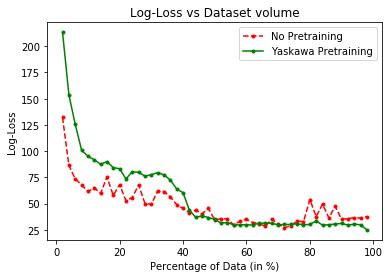

In [22]:
# plot combined pretrain and no pretrain
plt.cla()
plt.plot([percent*100 for percent in percents], [ll*100 for ll in lls_no_pretrain], '.r--')
plt.plot([percent*100 for percent in percents], [ll*100 for ll in lls_pretrain], '.g-')
plt.title(f"Log-Loss vs Dataset volume")
plt.xlabel("Percentage of Data (in %)")
plt.ylabel("Log-Loss")
plt.legend(["No Pretraining", "Yaskawa Pretraining"])
# plt.show()
plt.savefig("/home/ss26/Projects/Smart-Tools/progress/apr5/lls_vs_data/pretrain_no_pretrain_combined.png", dpi=600)

In [24]:
df_human = pd.read_parquet("/home/ss26/Projects/Smart-Tools/data/F2021_Human_Smoothened_Cleaned_Processed.parquet")
df_robot = pd.read_parquet("/home/ss26/Projects/Smart-Tools/data/S2023_Yaskawa_Smoothened_Cleaned_Processed.parquet")

In [33]:
df_human = df_human.iloc[:, :-1]
df_human

,accX_min,accX_max,accX_mean,accX_kurt,accX_sem,accX_std,accX_var,accX_skew,accX_mad,accX_sum,...,Srms_min,Srms_max,Srms_mean,Srms_kurt,Srms_sem,Srms_std,Srms_var,Srms_skew,Srms_mad,Srms_sum
0,-0.759991,-0.117976,-0.669790,4.109634,0.004312,0.139049,0.019335,2.174608,0.098441,-696.581374,...,12587.000601,21223.085111,14462.124077,4.897248,42.222838,1361.645605,1.854079e+06,1.923157,951.256416,1.504061e+07
0,-0.759991,-0.125009,-0.688918,8.102496,0.003173,0.102315,0.010468,2.711471,0.066623,-716.475027,...,12587.000601,21223.085111,14968.674436,0.660083,52.893408,1705.761140,2.909621e+06,1.120488,1369.761302,1.556742e+07
0,-0.759968,-0.230558,-0.691997,4.443001,0.003273,0.105555,0.011142,2.271812,0.072674,-719.676453,...,11937.428673,19413.955078,14989.709171,-0.006561,51.124212,1648.706287,2.718232e+06,0.884709,1288.423744,1.558930e+07
0,-0.759991,-0.230558,-0.722018,15.587123,0.002529,0.081565,0.006653,3.906720,0.041109,-750.898804,...,11937.428673,19088.520207,14468.049298,1.252940,43.745374,1410.745912,1.990204e+06,1.183401,1012.773193,1.504677e+07
0,-0.759996,-0.275921,-0.732632,42.422537,0.001316,0.042452,0.001802,5.425343,0.022259,-761.937401,...,11620.837139,17814.911997,14279.456937,0.455534,37.805946,1219.205127,1.486461e+06,0.703156,900.093122,1.485064e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-1.132348,0.606445,-0.366252,-1.707510,0.017862,0.576020,0.331799,-0.028667,0.542337,-380.902311,...,13993.882963,39963.232422,27058.489939,-1.567500,283.288701,9135.786106,8.346259e+07,-0.357733,8429.585848,2.814083e+07
0,-1.138808,0.561833,-0.405905,-1.596050,0.017590,0.567248,0.321771,0.110850,0.527934,-422.141583,...,13993.882963,39972.816857,27245.765795,-1.273303,256.795123,8281.393874,6.858148e+07,-0.503742,7279.283660,2.833560e+07
0,-1.138808,0.723346,-0.558819,-1.134675,0.017910,0.577581,0.333600,0.706834,0.524739,-581.172260,...,13758.245868,39972.816857,24485.910173,-1.642589,289.163249,9325.234568,8.696000e+07,0.185155,8728.909298,2.546535e+07
0,-1.152179,0.723346,-0.468466,-1.625970,0.020031,0.623875,0.389220,0.400381,0.596324,-454.411612,...,13758.245868,39990.593450,25406.666358,-1.836835,340.366541,10600.655682,1.123739e+08,0.169731,10234.361774,2.464447e+07


In [35]:
df_human_accXs = df_human.iloc[:, :10]
df_human_accYs = df_human.iloc[:, 10:20]
df_human_accZs = df_human.iloc[:, 20:30]

df_human_wxs = df_human.iloc[:, 30:40]
df_human_wys = df_human.iloc[:, 40:50]
df_human_wzs = df_human.iloc[:, 50:60]

df_human_bxs = df_human.iloc[:, 60:70]
df_human_bys = df_human.iloc[:, 70:80]
df_human_bzs = df_human.iloc[:, 80:90]

df_human_isens = df_human.iloc[:, 90:100]

df_human_srms = df_human.iloc[:, 100:110]